In [ ]:
import numpy as np  
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

import seaborn as sns 

<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

In [ ]:
Delta = 3        # Желаемая точность
sq_sigma = 225   # Дисперсия
Z = 1.96         # Квантиль нормального распределения (для уровня доверия 0.95)

In [ ]:
sigma = sq_sigma ** (0.5)  # стандартное отклонение
sigma

15.0

In [ ]:
n = int((sigma*Z/Delta)**2)     # минимально необходимый объем выборки для построения интервальной оценки среднего
n

96

<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [ ]:
beta = 0.98     # уровень доверия 
Z = 2.326       # Квантиль нормального распределения (для уровня доверия 0.98)
n = 25          # объем выборки
x_mean = 130    # среднее по выборке x
sigma = 15      # стандартное отклонение

In [ ]:
Delta = Z *sigma / (n ** 0.5)
Delta

6.978

In [ ]:
L1 = x_mean - Delta
L2 = x_mean + Delta
print('Доверительный интервал: ', L1, L2)

Доверительный интервал:  123.022 136.978


In [ ]:
L = int(L2 - L1)
print('Длина полученного доверительного интервала : ', L)

Длина полученного доверительного интервала :  13


<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [ ]:
np.random.seed(42) #фиксация случайности

mens  = stats.norm.rvs(loc=171, scale=100, size=150000)  # Выборка мужчин со средним ростом 171
womens = stats.norm.rvs(loc=170, scale=100, size=150000)  # Выборка женщин со средним ростом 170
#В двух строчках выше генерируется две выбороки, где loc это среднее значение, а scale это дисперсия

(-3.6635841716708892, 0.00024875321033580573)

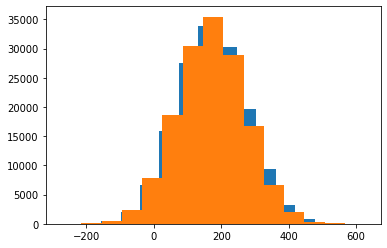

In [ ]:
# визуально выборки очень мало отличаются друг от друга, p-value < alfa, поэтому отклоняем нулевую гипотезу, то есть - средние значения двух распределений различны и это различие статистически значимо

plt.hist(womens, bins=15);
plt.hist(mens, bins=15);
t, p_value = stats.ttest_ind(womens, mens) #Критерий Стьюдента (t-test)
t, p_value

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [ ]:
sigma = 150
Z = 1.96        # для уровня доверия 0.95
Delta = 50

In [ ]:
n = int((sigma*Z/Delta)**2)
n

34

<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [ ]:
observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
observations

,Верные ответы волшебника,Неверные ответы
Дождь,10,15
Солнце,39,34


In [ ]:
# принимаем нулевую гипотезу о том, что обе группы имеют равные средние
oddsratio, pvalue = stats.fisher_exact(observations) # p-value получился достаточно большим (больше альфа 0.05), поэтому оснований отвергнуть нулевую гипотезу нет.
pvalue

0.35417955365927367

<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [ ]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

mean_confidence_interval(data, confidence = 0.1)

(6.587030605748577, 6.628571428571429, 6.670112251394281)

<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки `A` и `B` одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [ ]:
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]


(-2.0349336314319992, 0.042739435733033855)

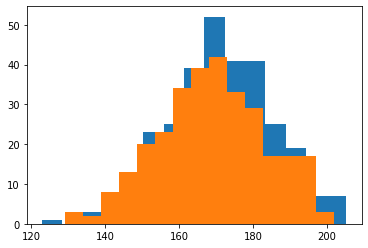

In [ ]:
plt.hist(B, bins=15);              # визуально граифики по двум выборкам частично совпадают
plt.hist(A, bins=15);
t, p_value = stats.ttest_rel(A, B) # если уровень значимости принять за 0.01, то p-value > 0.01, поэтому будем считать, что выборки принадлежат к одному множеству
t, p_value                        # если уровень значимости принять за 0.05, то p-value < 0.05, поэтому будем считать, что выборки не принадлежат к одному множеству (статистически значимо различны)

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

In [ ]:
# так как p-value меньше уровня значимости (0.03 < 0.05), то мы отклоняем нулевую гипотезу о равенстве средних данных выборок и принимаем альтернативную (наши выборки статистически значимо отличны)
# нормлаьное распределение не может быть определено ттестом. для это используют визуальную оценку или другие стат тесты


**Задание № 8**
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=15, loc=169, size=300)
B = stats.norm.rvs(scale=14, loc=171.4, size=300)

(-1.95300880485141, 0.051284593140469285)

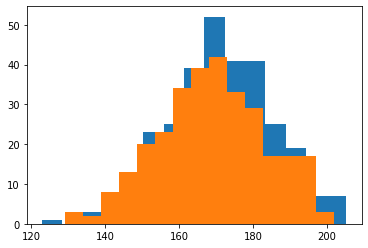

In [ ]:
plt.hist(B, bins=15);              # визуально граифики есть незначительные отличия между графиками
plt.hist(A, bins=15);
t, p_value = stats.ttest_ind(A, B) # p-value больше уровня значимости (0.051 > 0.05), эффективность статистически значимо не отличается
t, p_value                         # при минимальном p-value 0.049 различия были бы уже значимы